In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from matplotlib import pyplot as plt

import seaborn as sns

In [4]:
df = pd.read_csv('creditcard.csv')

In [5]:
df.drop_duplicates(inplace=True)


In [6]:
df.drop('Time', axis=1, inplace=True)


In [7]:
X = df.iloc[:,df.columns != 'Class']
y = df.Class

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=5, stratify=y)

In [9]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)


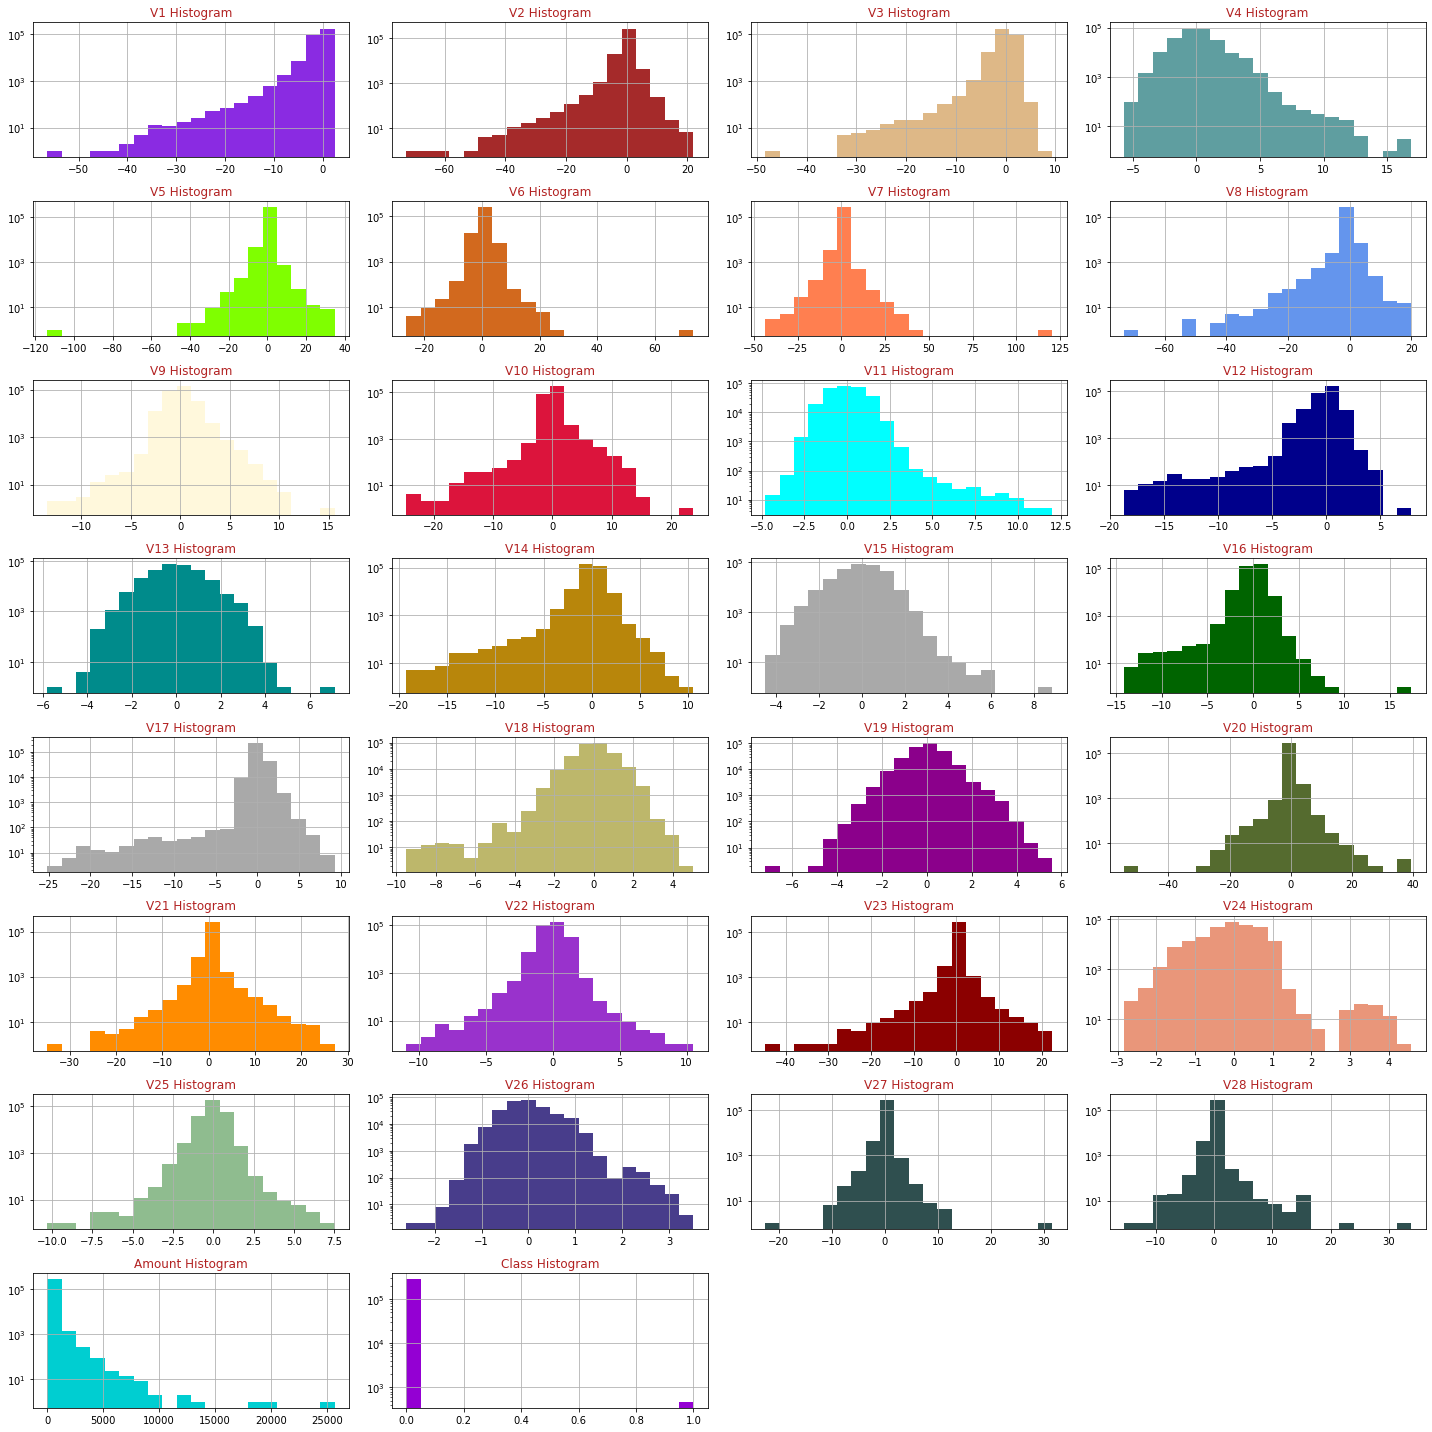

In [11]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(df,df.columns,8,4)

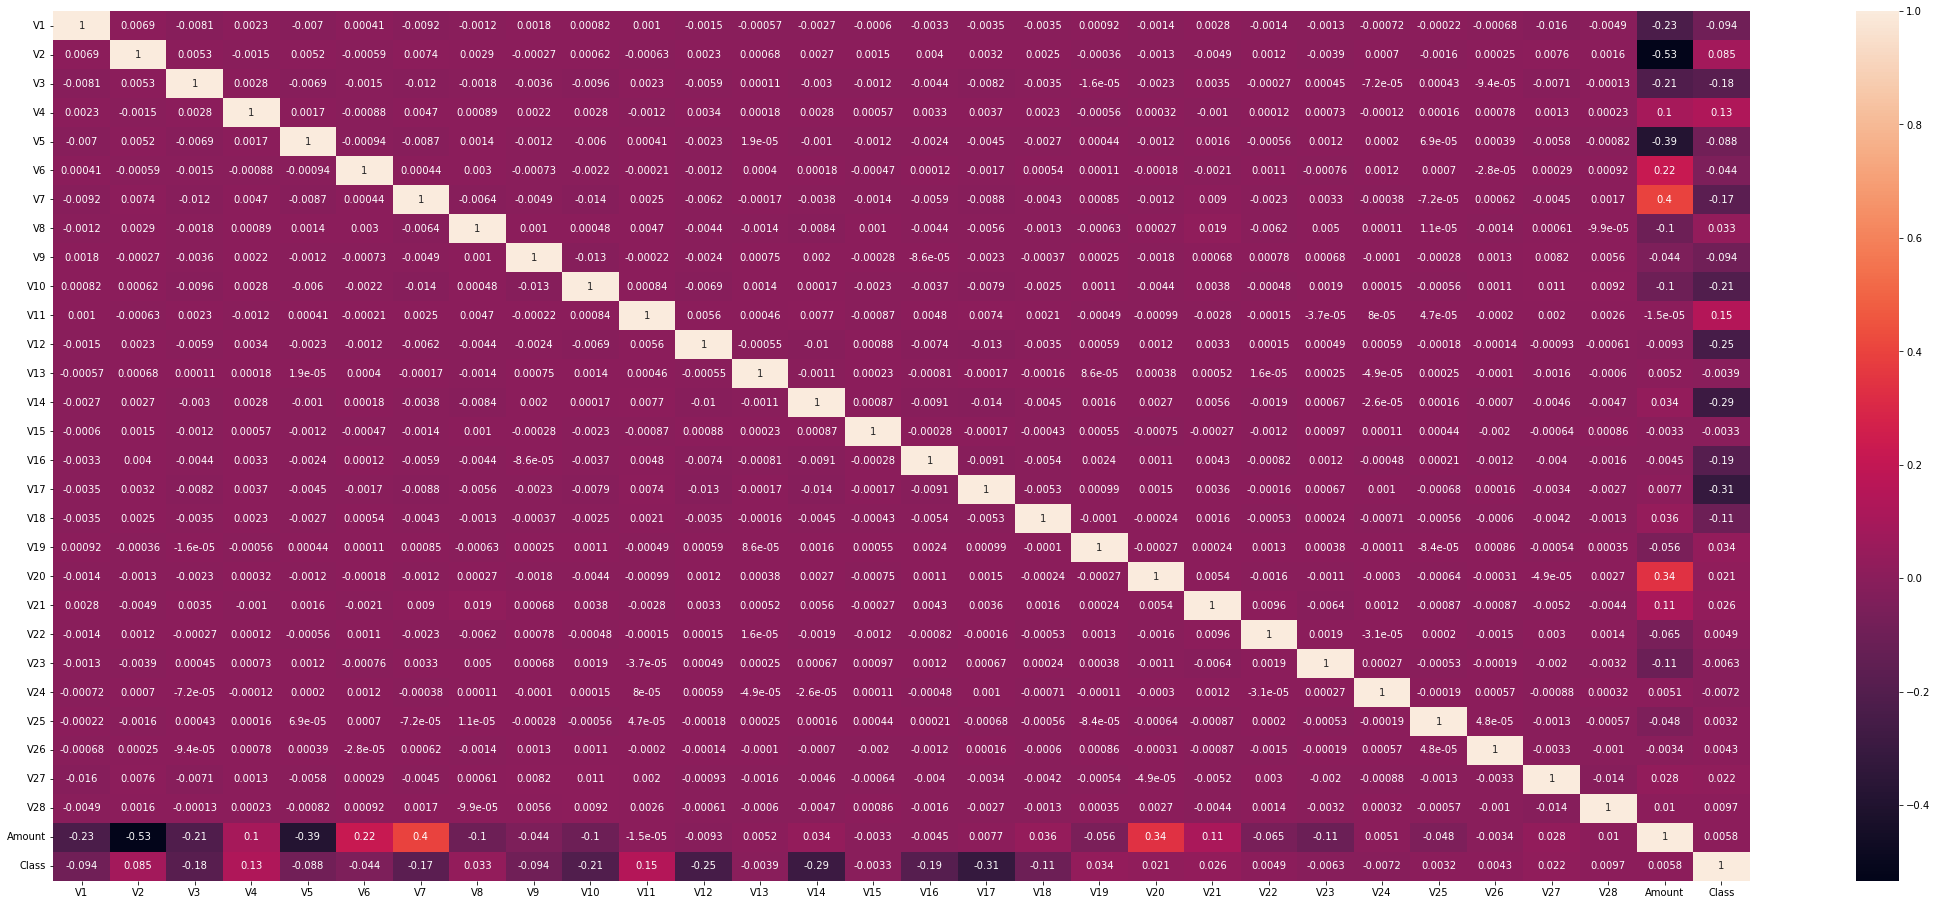

In [12]:
plt.figure(figsize = (38,16))
sns.heatmap(df.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

In [13]:
model = LogisticRegression()


In [14]:
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [15]:
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 99.92642523570359


In [ ]:
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

In [17]:
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 99.92642523570359


In [23]:
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

In [24]:
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 99.92069925633524


In [25]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.84      0.65      0.73        95

    accuracy                           1.00     56746
   macro avg       0.92      0.83      0.87     56746
weighted avg       1.00      1.00      1.00     56746



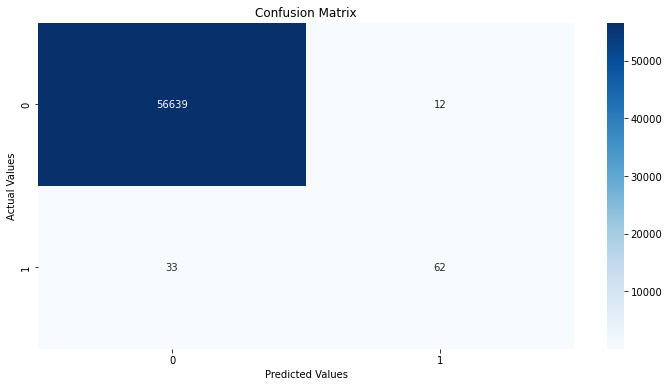

In [26]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')